In [204]:
!pip install nxviz==0.7.4

  Using cached nxviz-0.7.4-py3-none-any.whl (28 kB)
  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\Augusto\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [151]:
# Install requirements for scripts
!pip install geocoder==1.38.1

In [2]:
# import usefull packages
!pip install nxviz==0.6.3
!pip install geocoder==1.38.1
!pip install matplotlib==3.1.3

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns

  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\Augusto\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [501 lines of output]
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.3]
        python: yes [3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023,
                    18:18:15) [MSC v.1916 64 bit (AMD64)]]
      platform: yes [win32]
  
  OPTIONAL SUBPACKAGES
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
  
  OPTIONAL BACKEND EXTENSIONS
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  OPTIONAL PACKAGE DATA
          dlls: no  [skipping due to configuration]
  
  C:\Users\Augusto\anaconda3\lib\site-packages\setuptools\dist.py:285: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated, consider using implicit namespaces instead (PEP 420).
    warnings.warn(msg, Setupt

  Using cached matplotlib-3.1.3.tar.gz (40.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Running setup.py install for matplotlib: started
  Running setup.py install for matplotlib: finished with status 'error'


ImportError: cannot import name 'axes' from 'matplotlib' (C:\Users\Augusto\anaconda3\lib\site-packages\matplotlib\__init__.py)

In [41]:
!python extract.py


100%|##########| 24/24 [00:02<00:00,  8.48it/s]


In [42]:
!python transform_to_anac_csv.py

In [43]:
!python transform_to_airports_csv.py

In [44]:
!python transform_to_graphml.py

In [108]:
G = nx.read_graphml('./data/air_traffic.graphml')

airports = pd.read_csv('./data/airports.csv', index_col="code")

airports.head()

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,32.896801,-97.038002
KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,40.639801,-73.778900
KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,25.793200,-80.290604
SBCF,CONFINS,MG,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.624443,-43.971943
SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.809999,-43.250557


In [49]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1124 nodes and 10132 edges


In [105]:
br_traffic = list(node[0] for node in G.nodes(data=True) if node[1]["country"] == "BRASIL")
G_brasil = nx.subgraph(G, br_traffic)

nx.write_graphml(G_brasil, path='data/air_traffic_brasil.graphml')

G_brasil = nx.read_graphml('./data/air_traffic_brasil.graphml')

print("The network has {} nodes and {} edges".format(G_brasil.number_of_nodes(),
                                                     G_brasil.number_of_edges()))

The network has 510 nodes and 4568 edges


In [107]:
for node in G_brasil.nodes(data=True):
    node[1]["state"] = airports.loc[node[0], "state"]
    node[1]["region"] = airports.loc[node[0], "region"]
    
G_brasil.nodes(data=True)

NodeDataView({'SSLT': {'name': 'ALEGRETE', 'country': 'BRASIL', 'latitude': -29.8127002716, 'longitude': -55.8933982849, 'state': 'RS', 'region': 'SUL'}, 'SBBR': {'name': 'BRASÍLIA', 'country': 'BRASIL', 'latitude': -15.869167, 'longitude': -47.920834, 'state': 'DF', 'region': 'CENTRO-OESTE'}, 'SSER': {'name': 'ERECHIM', 'country': 'BRASIL', 'latitude': -27.66189956665039, 'longitude': -52.2682991027832, 'state': 'RS', 'region': 'SUL'}, 'SBME': {'name': 'MACAÉ', 'country': 'BRASIL', 'latitude': -22.343000412, 'longitude': -41.7659988403, 'state': 'RJ', 'region': 'SUDESTE'}, 'SNMD': {'name': 'ITAITUBA', 'country': 'BRASIL', 'latitude': -6.820556163787842, 'longitude': -56.844722747802734, 'state': 'PA', 'region': 'NORTE'}, 'SIXE': {'name': 'ELDORADO DO SUL', 'country': 'BRASIL', 'latitude': -30.050277709960938, 'longitude': -51.44361114501953, 'state': 'RS', 'region': 'SUL'}, 'SJDB': {'name': 'BONITO', 'country': 'BRASIL', 'latitude': -20.48832999999996, 'longitude': -54.61451999999997,

## 1 - Study on the assortativity 

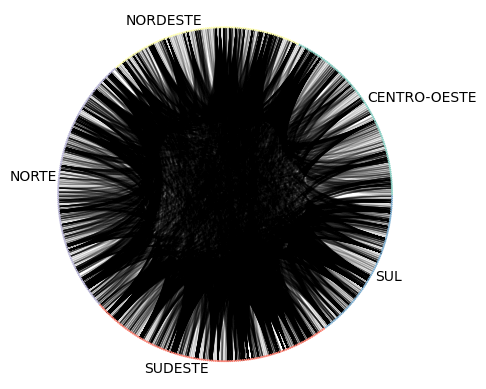

In [221]:
from nxviz import annotate, CircosPlot
import matplotlib.pyplot as plt


c = nv.circos(G_brasil, 
               group_by="region",
               node_color_by="region")

annotate.circos_group(G_brasil, group_by="region")

plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# plt.figure(figsize=(20, 16))
plt.show()

In [110]:
nx.attribute_mixing_matrix(G_brasil,'region')

array([[0.17294221, 0.05461909, 0.0339317 , 0.02758319, 0.04060858],
       [0.05461909, 0.08231173, 0.0107268 , 0.02035902, 0.01335377],
       [0.0339317 , 0.0107268 , 0.05341506, 0.02287653, 0.01204028],
       [0.02758319, 0.02035902, 0.02287653, 0.13222417, 0.00711471],
       [0.04060858, 0.01335377, 0.01204028, 0.00711471, 0.07267951]])

In [103]:
nx.attribute_assortativity_coefficient(G_brasil, "region")

0.3725974224135194

#### Assortativity coefficient

- $-1 <= x < 0 \Rightarrow$ The network is disassortativity
- $0 <= x <= 1 \Rightarrow$ The network is assortativity

Thus, the associative coefficient shows us that this network is assortative, that is, nodes of a group tend to interact with other nodes of the same group.

## Assortividade de Degree

In [223]:
nx.degree_assortativity_coefficient(G_brasil)

-0.19605264855558172

In [225]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_brasil).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)
print(degree)
print(avg_neigh_degree)

[5, 139, 18, 35, 7, 1, 6, 3, 100, 10, 113, 2, 31, 16, 24, 97, 30, 22, 130, 62, 8, 34, 91, 26, 14, 15, 17, 32, 60, 49, 44, 23, 12, 27, 9, 45, 127, 11, 164, 61, 0, 4, 59, 122, 92, 21, 63, 124, 53, 20, 72, 29, 28, 131, 40, 13, 87, 56, 36, 88, 50, 128, 75, 48, 133, 54, 132, 79, 47, 19, 66, 85, 39, 159, 108, 134, 57, 42, 37, 52, 95, 41, 25, 69, 58, 168, 156, 46, 64]
[68.824, 47.78417266187051, 64.34722222222223, 83.27428571428571, 65.81632653061224, 112.91304347826087, 60.81159420289855, 73.43243243243244, 58.17, 56.16, 49.02654867256637, 77.65, 70.07741935483871, 93.09375, 72.22916666666667, 58.45360824742268, 99.9, 90.6948051948052, 46.37692307692308, 68.79032258064517, 58.8515625, 71.72058823529412, 60.83516483516483, 84.13461538461539, 64.47619047619048, 67.25714285714285, 75.00840336134453, 73.23660714285714, 63.96666666666667, 83.8639455782313, 55.09090909090909, 53.30434782608695, 51.20454545454545, 94.4074074074074, 64.9074074074074, 77.02222222222223, 49.645669291338585, 68.1590909

Text(0, 0.5, 'Average neighbor degree')

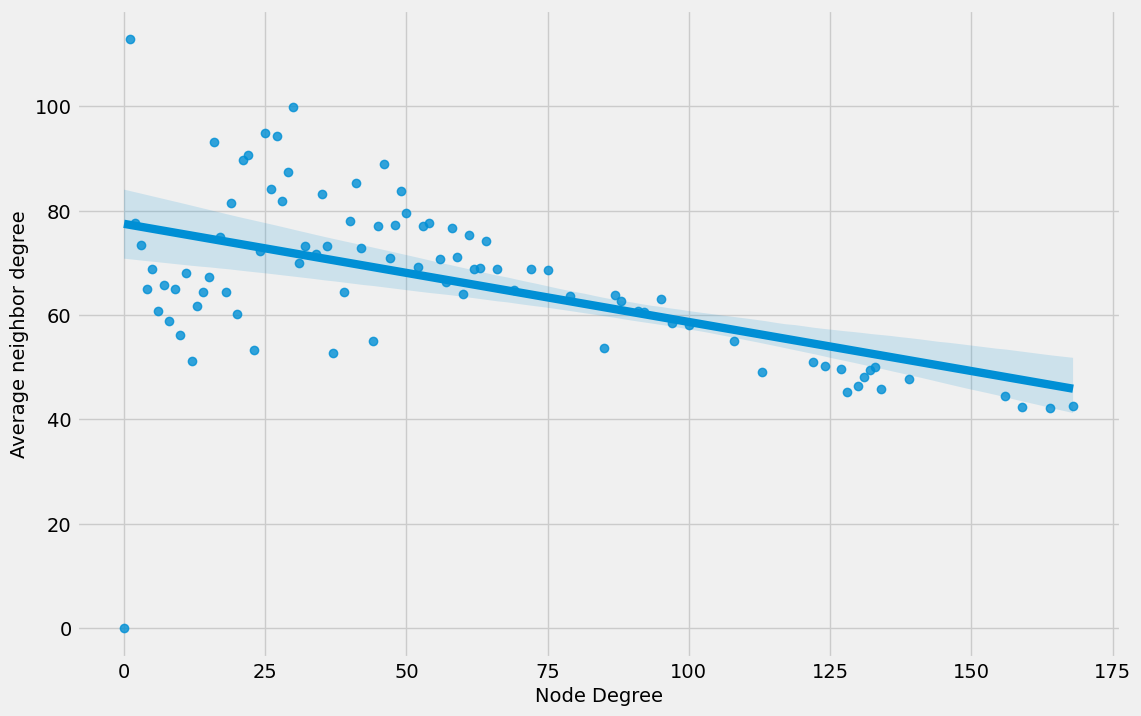

In [228]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(x=degree,y=avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neighbor degree")